In [1]:
import os
import sys

In [2]:
# This code handles to load external library python file   =>  "swap_test.py" in jupyter environment
sys.path.append(os.path.abspath("/home/mahdi/Desktop/Thesis_projects/quantum_parts/K_Means_clustering"))

In [3]:
import cirq
from swap_test import SwapTest
import pandas as pd
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [4]:
class QuantumKMeans:
    def __init__(self,data_csv,num_clusters,
        features,copies=1000,iters=100):
        self.data_csv = data_csv
        self.num_clusters = num_clusters
        self.features = features
        self.copies = copies
        self.iters = iters
    def data_preprocess(self):
        df = pd.read_csv(self.data_csv)
        df['theta'] = df.apply(lambda x:math.atan(x[self.features[1]]/x[self.features[0]]), axis=1)
        self.X = df.values[:,:2]
        self.X.astype(float)
        self.row_norms = np.sqrt((self.X**2).sum(axis=1))
        self.X = self.X/self.row_norms[:, np.newaxis]
        self.X_q_theta = df.values[:,2]
        self.num_data_points = self.X.shape[0]
        return df
    def distance(self,x,y):
        st = SwapTest(prepare_input_states=True, input_state_dim=2, measure=True,copies=self.copies)
        st.build_circuit(input_1_transforms=[cirq.ry(x)],input_2_transforms=[cirq.ry(y)])
        prob_0, _ = st.simulate()
        _distance_ = 1 - prob_0
        del st
        return(_distance_)
    def init_clusters(self):
        self.cluster_points=np.random.randint(self.num_data_points,size=self.num_clusters)
        self.cluster_data_points = self.X[self.cluster_points,:]
        self.cluster_theta = self.X_q_theta[self.cluster_points]
        self.clusters = np.zeros(len(self.X_q_theta))
    def assign_clusters(self):
        self.distance_matrix = np.zeros((self.num_data_points,self.num_clusters))
        for i,x in enumerate(list(self.X_q_theta)):
            for j,y in enumerate(list(self.cluster_theta)):
                self.distance_matrix[i, j] = self.distance(x,y)
        self.clusters = np.argmin(self.distance_matrix,axis=1)
        labels = self.clusters
        return(labels)
        # labels are fitted clusters from input data
    def update_clusters(self):
        updated_cluster_data_points = []
        updated_cluster_theta = []
        for k in range(self.num_clusters):
            centroid = np.mean(self.X[self.clusters == k],axis=0)
            centroid_theta = math.atan(centroid[1]/centroid[0])
            updated_cluster_data_points.append(centroid)
            updated_cluster_theta.append(centroid_theta)
        self.cluster_data_points= np.array(updated_cluster_data_points)
        self.cluster_theta = np.array(updated_cluster_theta)
    def plot(self):
        fig = plt.figure(figsize=(8, 8))
        colors = ['red', 'green', 'blue', 'purple','yellow','black']
        plt.scatter(self.X[:,0],self.X[:,1],c=self.clusters,cmap=matplotlib.colors.ListedColormap(colors[:self.num_clusters]))
        plt.savefig('Clusters.png')
    def run(self):
        self.data_preprocess()
        self.init_clusters()
        for i in range(self.iters):
            self.assign_clusters()
            self.update_clusters()
        self.plot()
        
        
    

<ipython-input-4-f584b91d7548>:11: RuntimeWarning: divide by zero encountered in double_scalars
  df['theta'] = df.apply(lambda x:math.atan(x[self.features[1]]/x[self.features[0]]), axis=1)


1
Ry(12.25493061807594π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.255π)────×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(12.25493061807594π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.255π)────×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(12.25493061807594π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.255π)────×────────────────
                    │
2: ───Ry(-0.063π)───×────────────────
1
Ry(12.25493061807594π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.255π)────×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.096π)────×────────────────
                    │
2: ───Ry(-0.223π)───×─

1
Ry(12.414085561167836π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.414π)────×────────────────
                    │
2: ───Ry(-0.063π)───×────────────────
1
Ry(12.414085561167836π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.414π)────×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.096π)────×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.096π)────×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.096π)────×────────────────
                    │
2: ───Ry(-0.063π)─

Ry(12.25493061807594π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.255π)────×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(12.25493061807594π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.255π)────×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(12.25493061807594π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.255π)────×────────────────
                    │
2: ───Ry(-0.063π)───×────────────────
1
Ry(12.25493061807594π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.255π)────×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×───

[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.096π)────×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.096π)────×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.096π)────×────────────────
                    │
2: ───Ry(-0.063π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.096π)────×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(12.25493061807594π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.255π)────×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(12

1
Ry(13.050705333535419π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(1.05π)─────×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(13.050705333535419π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(1.05π)─────×────────────────
                    │
2: ───Ry(-0.063π)───×────────────────
1
Ry(13.050705333535419π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(1.05π)─────×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.93662073189215π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.063π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.93662073189215π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.063π)───×────────────────
                    │
2: ───Ry(-0.223π)───

1
Ry(12.732395447351628π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.732π)────×────────────────
                    │
2: ───Ry(-0.063π)───×────────────────
1
Ry(12.732395447351628π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.732π)────×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.096π)────×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.096π)────×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.096π)────×────────────────
                    │
2: ───Ry(-0.063π)─

1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.93662073189215π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.063π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.93662073189215π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.063π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.93662073189215π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.063π)───×────────────────
                    │
2: ───Ry(-0.063π)───×────────────────
1
Ry(11.93662073189215π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.063π)───×────────────────
                    │
2: ───Ry(-0.223π)───×─

1
Ry(12.414085561167836π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.414π)────×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(12.414085561167836π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.414π)────×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(12.414085561167836π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.414π)────×────────────────
                    │
2: ───Ry(-0.063π)───×────────────────
1
Ry(12.414085561167836π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.414π)────×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(12.414085561167836π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.414π)────×────────────────
                    │
2: ───Ry(-0.223π)─

1
Ry(11.61831084570836π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.382π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.61831084570836π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.382π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.61831084570836π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.382π)───×────────────────
                    │
2: ───Ry(-0.063π)───×────────────────
1
Ry(11.61831084570836π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.382π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.459155902616464π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.541π)───×────────────────
                    │
2: ───Ry(-0.223π)───×─

1
Ry(11.61831084570836π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.382π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.459155902616464π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.541π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.459155902616464π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.541π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.459155902616464π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.541π)───×────────────────
                    │
2: ───Ry(-0.063π)───×────────────────
1
Ry(11.459155902616464π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.541π)───×────────────────
                    │
2: ───Ry(-0.223π)──

1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.063π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)─

1
Ry(12.732395447351628π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.732π)────×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(12.732395447351628π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.732π)────×────────────────
                    │
2: ───Ry(-0.063π)───×────────────────
1
Ry(12.732395447351628π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.732π)────×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(12.732395447351628π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.732π)────×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(12.732395447351628π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.732π)────×────────────────
                    │
2: ───Ry(-0.223π)─

1
Ry(11.459155902616464π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.541π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.459155902616464π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.541π)───×────────────────
                    │
2: ───Ry(-0.063π)───×────────────────
1
Ry(11.459155902616464π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.541π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(12.732395447351628π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.732π)────×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(12.732395447351628π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.732π)────×────────────────
                    │
2: ───Ry(-0.223π)─

1
Ry(12.414085561167836π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.414π)────×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(12.414085561167836π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.414π)────×────────────────
                    │
2: ───Ry(-0.063π)───×────────────────
1
Ry(12.414085561167836π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.414π)────×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.096π)────×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.096π)────×────────────────
                    │
2: ───Ry(-0.223π)─

1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.063π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.063π)─

1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.096π)────×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.063π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)─

1
Ry(12.732395447351628π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.732π)────×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(12.732395447351628π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.732π)────×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(12.732395447351628π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.732π)────×────────────────
                    │
2: ───Ry(-0.063π)───×────────────────
1
Ry(12.732395447351628π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.732π)────×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.459155902616464π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.541π)───×────────────────
                    │
2: ───Ry(-0.223π)─

1
Ry(11.459155902616464π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.541π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.459155902616464π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.541π)───×────────────────
                    │
2: ───Ry(-0.063π)───×────────────────
1
Ry(11.459155902616464π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.541π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.096π)────×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.096π)────×────────────────
                    │
2: ───Ry(-0.223π)─

1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.063π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)─

1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.063π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)─

1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(12.414085561167836π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.414π)────×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(12.414085561167836π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.414π)────×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(12.414085561167836π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.414π)────×────────────────
                    │
2: ───Ry(-0.063π)───×────────────────
1
Ry(12.414085561167836π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.414π)────×────────────────
                    │
2: ───Ry(-0.223π)─

1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.063π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)─

1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.096π)────×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.096π)────×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.096π)────×────────────────
                    │
2: ───Ry(-0.063π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.096π)────×────────────────
                    │
2: ───Ry(-0.223π)─

Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.063π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───

1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.063π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.063π)─

1
Ry(12.414085561167836π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.414π)────×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(12.414085561167836π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.414π)────×────────────────
                    │
2: ───Ry(-0.063π)───×────────────────
1
Ry(12.414085561167836π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.414π)────×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.096π)────×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.096π)────×────────────────
                    │
2: ───Ry(-0.223π)─

1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.096π)────×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.096π)────×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.096π)────×────────────────
                    │
2: ───Ry(-0.063π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.096π)────×────────────────
                    │
2: ───Ry(-0.223π)─

1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.063π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)─

1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.063π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)─

Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.096π)────×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.096π)────×────────────────
                    │
2: ───Ry(-0.063π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.096π)────×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───

1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.063π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)─

1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.063π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)─

1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.063π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.096π)────×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.096π)────×────────────────
                    │
2: ───Ry(-0.223π)─

[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.063π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(1

1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.063π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.063π)─

1
Ry(12.414085561167836π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.414π)────×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(12.414085561167836π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.414π)────×────────────────
                    │
2: ───Ry(-0.063π)───×────────────────
1
Ry(12.414085561167836π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(0.414π)────×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)─

1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.063π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(-0.223π)─

<ipython-input-4-f584b91d7548>:11: RuntimeWarning: divide by zero encountered in double_scalars
  df['theta'] = df.apply(lambda x:math.atan(x[self.features[1]]/x[self.features[0]]), axis=1)


1
Ry(12.25493061807594π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.255π)───×────────────────
                   │
2: ───Ry(0.005π)───×────────────────
1
Ry(12.25493061807594π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.255π)───×────────────────
                   │
2: ───Ry(0.004π)───×────────────────
1
Ry(12.25493061807594π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.255π)───×────────────────
                   │
2: ───Ry(0.005π)───×────────────────
1
Ry(12.25493061807594π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.255π)───×────────────────
                   │
2: ───Ry(0.007π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.096π)───×────────────────
                   │
2: ───Ry(0.005π)───×────────────────
1
Ry(12.0

1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.007π)────×────────────────
1
Ry(12.414085561167836π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.414π)───×────────────────
                   │
2: ───Ry(0.005π)───×────────────────
1
Ry(12.414085561167836π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.414π)───×────────────────
                   │
2: ───Ry(0.004π)───×────────────────
1
Ry(12.414085561167836π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.414π)───×────────────────
                   │
2: ───Ry(0.005π)───×────────────────
1
Ry(12.414085561167836π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.414π)───×────────────────
                   │
2: ───Ry(0.007π)───×────────────────


1
Ry(12.732395447351628π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.732π)───×────────────────
                   │
2: ───Ry(0.005π)───×────────────────
1
Ry(12.732395447351628π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.732π)───×────────────────
                   │
2: ───Ry(0.007π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.096π)───×────────────────
                   │
2: ───Ry(0.005π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.096π)───×────────────────
                   │
2: ───Ry(0.004π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.096π)───×────────────────
                   │
2: ───Ry(0.005π)───×────────────────
1
Ry(

0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.096π)───×────────────────
                   │
2: ───Ry(0.005π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.096π)───×────────────────
                   │
2: ───Ry(0.004π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.096π)───×────────────────
                   │
2: ───Ry(0.005π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.096π)───×────────────────
                   │
2: ───Ry(0.007π)───×────────────────
1
Ry(12.25493061807594π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.255π)───×────────────────
                   │
2: ───Ry(0.005π)───×────────────────
1
Ry(12.25493061807594π)
[cirq.LineQubit(1)]
0: ───H

1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.007π)────×────────────────
1
Ry(12.25493061807594π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.255π)───×────────────────
                   │
2: ───Ry(0.005π)───×────────────────
1
Ry(12.25493061807594π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.255π)───×────────────────
                   │
2: ───Ry(0.004π)───×────────────────
1
Ry(12.25493061807594π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.255π)───×────────────────
                   │
2: ───Ry(0.005π)───×────────────────
1
Ry(12.25493061807594π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.255π)───×────────────────
                   │
2: ───Ry(0.007π)───×────────────────
1
Ry

1
Ry(12.732395447351628π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.732π)───×────────────────
                   │
2: ───Ry(0.004π)───×────────────────
1
Ry(12.732395447351628π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.732π)───×────────────────
                   │
2: ───Ry(0.005π)───×────────────────
1
Ry(12.732395447351628π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.732π)───×────────────────
                   │
2: ───Ry(0.007π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.096π)───×────────────────
                   │
2: ───Ry(0.005π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.096π)───×────────────────
                   │
2: ───Ry(0.004π)───×────────────────
1
Ry(

1
Ry(12.732395447351628π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.732π)───×────────────────
                   │
2: ───Ry(0.005π)───×────────────────
1
Ry(12.732395447351628π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.732π)───×────────────────
                   │
2: ───Ry(0.004π)───×────────────────
1
Ry(12.732395447351628π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.732π)───×────────────────
                   │
2: ───Ry(0.005π)───×────────────────
1
Ry(12.732395447351628π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.732π)───×────────────────
                   │
2: ───Ry(0.007π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────


1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.004π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.007π)────×────────────────
1
Ry(11.61831084570836π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.382π)───×────────────────
                    │
2: ───Ry(0.005π)───

0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.063π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.93662073189215π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.063π)───×────────────────
                    │
2: ───Ry(0.007π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.004π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.777465788800255π)
[

1
Ry(11.93662073189215π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.063π)───×────────────────
                    │
2: ───Ry(0.004π)────×────────────────
1
Ry(11.93662073189215π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.063π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.93662073189215π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.063π)───×────────────────
                    │
2: ───Ry(0.007π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.004π)────×

1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.007π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.004π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)──

1
Ry(11.61831084570836π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.382π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.61831084570836π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.382π)───×────────────────
                    │
2: ───Ry(0.004π)────×────────────────
1
Ry(11.61831084570836π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.382π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.61831084570836π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.382π)───×────────────────
                    │
2: ───Ry(0.007π)────×────────────────
1
Ry(11.459155902616464π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.541π)───×────────────────
                    │
2: ───Ry(0.005π)────×─

0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.004π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.007π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.004π)────×────────────────
1
Ry(11.777465788800255π)


1
Ry(11.459155902616464π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.541π)───×────────────────
                    │
2: ───Ry(0.004π)────×────────────────
1
Ry(11.459155902616464π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.541π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.459155902616464π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.541π)───×────────────────
                    │
2: ───Ry(0.007π)────×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.096π)───×────────────────
                   │
2: ───Ry(0.005π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.096π)───×────────────────
                   │
2: ───Ry(0.004π)───×───────

1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.096π)───×────────────────
                   │
2: ───Ry(0.004π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.096π)───×────────────────
                   │
2: ───Ry(0.005π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.096π)───×────────────────
                   │
2: ───Ry(0.007π)───×────────────────
1
Ry(11.459155902616464π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.541π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.459155902616464π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.541π)───×────────────────
                    │
2: ───Ry(0.004π)────×────────────

2: ───Ry(0.005π)───×────────────────
1
Ry(12.732395447351628π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.732π)───×────────────────
                   │
2: ───Ry(0.004π)───×────────────────
1
Ry(12.732395447351628π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.732π)───×────────────────
                   │
2: ───Ry(0.005π)───×────────────────
1
Ry(12.732395447351628π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.732π)───×────────────────
                   │
2: ───Ry(0.007π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.096π)───×────────────────
                   │
2: ───Ry(0.005π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.096π)───×────────────────
                   │
2: ──

1
Ry(12.732395447351628π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.732π)───×────────────────
                   │
2: ───Ry(0.004π)───×────────────────
1
Ry(12.732395447351628π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.732π)───×────────────────
                   │
2: ───Ry(0.005π)───×────────────────
1
Ry(12.732395447351628π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.732π)───×────────────────
                   │
2: ───Ry(0.007π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.096π)───×────────────────
                   │
2: ───Ry(0.005π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.096π)───×────────────────
                   │
2: ───Ry(0.004π)───×────────────────
1
Ry(

1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.004π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.007π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.004π)──

1
Ry(12.732395447351628π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.732π)───×────────────────
                   │
2: ───Ry(0.005π)───×────────────────
1
Ry(12.732395447351628π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.732π)───×────────────────
                   │
2: ───Ry(0.007π)───×────────────────
1
Ry(12.732395447351628π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.732π)───×────────────────
                   │
2: ───Ry(0.005π)───×────────────────
1
Ry(12.732395447351628π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.732π)───×────────────────
                   │
2: ───Ry(0.004π)───×────────────────
1
Ry(12.732395447351628π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.732π)───×────────────────
                   │
2: ───Ry(0.005π)───×────────────────
1
Ry(

1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.007π)────×────────────────
1
Ry(12.414085561167836π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.414π)───×────────────────
                   │
2: ───Ry(0.005π)───×────────────────
1
Ry(12.414085561167836π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.414π)───×────────────────
                   │
2: ───Ry(0.004π)───×────────────────
1
Ry(12.414085561167836π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.414π)───×────────────────
                   │
2: ───Ry(0.005π)───×────────────────
1
Ry(12.414085561167836π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.414π)───×────────────────
                   │
2: ───Ry(0.007π)───×────────────────


1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.004π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.007π)────×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.096π)───×────────────────
                   │
2: ───Ry(0.005π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.096π)───×────────────────
                   │
2: ───Ry(0.004π)───×───────

1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.007π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.004π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)──

1
Ry(12.414085561167836π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.414π)───×────────────────
                   │
2: ───Ry(0.005π)───×────────────────
1
Ry(12.414085561167836π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.414π)───×────────────────
                   │
2: ───Ry(0.007π)───×────────────────
1
Ry(12.414085561167836π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.414π)───×────────────────
                   │
2: ───Ry(0.005π)───×────────────────
1
Ry(12.414085561167836π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.414π)───×────────────────
                   │
2: ───Ry(0.004π)───×────────────────
1
Ry(12.414085561167836π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.414π)───×────────────────
                   │
2: ───Ry(0.005π)───×────────────────
1
Ry(

1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.004π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.007π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.004π)──

0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.096π)───×────────────────
                   │
2: ───Ry(0.005π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.096π)───×────────────────
                   │
2: ───Ry(0.007π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.004π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.Line

0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.007π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.004π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.777465788800255π)


1
Ry(12.414085561167836π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.414π)───×────────────────
                   │
2: ───Ry(0.005π)───×────────────────
1
Ry(12.414085561167836π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.414π)───×────────────────
                   │
2: ───Ry(0.007π)───×────────────────
1
Ry(12.414085561167836π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.414π)───×────────────────
                   │
2: ───Ry(0.005π)───×────────────────
1
Ry(12.414085561167836π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.414π)───×────────────────
                   │
2: ───Ry(0.004π)───×────────────────
1
Ry(12.414085561167836π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.414π)───×────────────────
                   │
2: ───Ry(0.005π)───×────────────────
1
Ry(

1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.004π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.007π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)──

1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.007π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.004π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)──

1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.007π)────×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.096π)───×────────────────
                   │
2: ───Ry(0.005π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.096π)───×────────────────
                   │
2: ───Ry(0.004π)───×────────────────
1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.096π)───×────────────────
                   │
2: ───Ry(0.005π)───×────────────

1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.007π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.004π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)──

1
Ry(12.095775674984045π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.096π)───×────────────────
                   │
2: ───Ry(0.007π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.004π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.007π)────×──

1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.004π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.007π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.004π)──

1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.004π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.007π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)──

1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.004π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.007π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)──

1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.004π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.007π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)──

1
Ry(12.414085561167836π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.414π)───×────────────────
                   │
2: ───Ry(0.005π)───×────────────────
1
Ry(12.414085561167836π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.414π)───×────────────────
                   │
2: ───Ry(0.004π)───×────────────────
1
Ry(12.414085561167836π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.414π)───×────────────────
                   │
2: ───Ry(0.005π)───×────────────────
1
Ry(12.414085561167836π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.414π)───×────────────────
                   │
2: ───Ry(0.007π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────


1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.007π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.004π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.007π)──

1
Ry(12.414085561167836π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.414π)───×────────────────
                   │
2: ───Ry(0.004π)───×────────────────
1
Ry(12.414085561167836π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.414π)───×────────────────
                   │
2: ───Ry(0.005π)───×────────────────
1
Ry(12.414085561167836π)
[cirq.LineQubit(1)]
0: ───H────────────@───H───M('m')───
                   │
1: ───Ry(0.414π)───×────────────────
                   │
2: ───Ry(0.007π)───×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.004π)────×────────────

1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.004π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.007π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.005π)────×────────────────
1
Ry(11.777465788800255π)
[cirq.LineQubit(1)]
0: ───H─────────────@───H───M('m')───
                    │
1: ───Ry(-0.223π)───×────────────────
                    │
2: ───Ry(0.004π)──

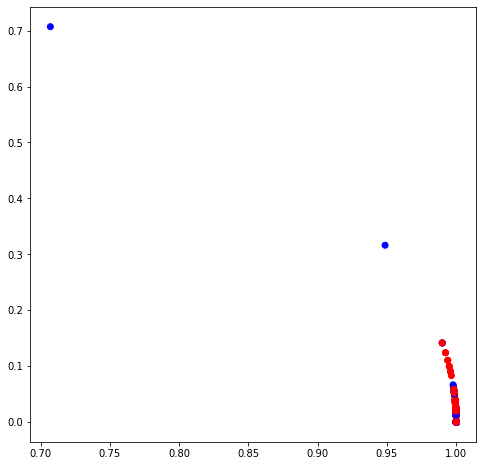

In [8]:
if __name__ == '__main__':
    num_clusters = 4
    data_csv = 'covid_meta_data.csv'
    qkmeans = QuantumKMeans(data_csv=data_csv, num_clusters=num_clusters,iters=10,features=['Sex',0])
    qkmeans.run()
    df = qkmeans.data_preprocess() # Raw dataframe of csv inputs
    df['Cluster'] = qkmeans.assign_clusters() # Final dataframe with lables values
    print(df)